In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading data set as data frame

In [ ]:
df=pd.read_csv('/content/drive/My Drive/ParkinsonsData.csv')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


# Data Preparation

In [ ]:
to_drop=list(df.columns[0:1])
df.drop(to_drop,1,inplace=True)

In [ ]:
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
mid = df['status']
df.drop(labels=['status'], axis=1, inplace = True)
df.insert(0, 'status', mid)
df

,status,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,1,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,1,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,1,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,0,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,0,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,0,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
df[df.columns[0]].value_counts()

1    147
0     48
Name: status, dtype: int64

In [ ]:
a=list(df.columns)
#df.columns
a

['status',
 'MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [ ]:
df.head()

,status,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,1,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,1,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,1,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.describe()

,status,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.753846,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,0.431878,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,0.000000,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,1.000000,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,1.000000,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,1.000000,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,1.000000,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# Normalizing the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df) 
df.loc[:,:] = scaled_values
df

,status,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,1.0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,0.332627,0.347354,0.172448,0.332584,0.068307,0.511745,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,1.0,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,0.515986,0.535685,0.279424,0.516048,0.059331,0.432577,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,1.0,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,0.443374,0.446133,0.219848,0.443317,0.039596,0.496220,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,1.0,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,0.475539,0.466079,0.233785,0.475478,0.040997,0.495936,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,1.0,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,0.584553,0.577341,0.286852,0.584542,0.054174,0.455499,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.0,0.499820,0.262986,0.165722,0.092440,0.090909,0.093931,0.089496,0.094076,0.286014,0.262942,0.362288,0.261601,0.155142,0.362306,0.085909,0.450134,0.447684,0.333127,0.257894,0.260408,0.549049,0.183318
191,0.0,0.705488,0.307974,0.138243,0.125794,0.090909,0.126686,0.107181,0.126826,0.164050,0.146261,0.221302,0.147490,0.088828,0.221338,0.055543,0.435097,0.408567,0.434101,0.319956,0.276956,0.605474,0.257558
192,0.0,0.502730,0.281413,0.050727,0.378653,0.288538,0.267823,0.252947,0.267940,0.123608,0.140509,0.156587,0.107870,0.072594,0.156631,0.338988,0.383728,0.352318,0.324299,0.212945,0.342577,0.558967,0.180580
193,0.0,0.642893,0.601807,0.054279,0.181703,0.130435,0.145472,0.159700,0.145288,0.122512,0.128184,0.156009,0.101900,0.066544,0.155989,0.227838,0.429936,0.454176,0.277579,0.220650,0.452885,0.318222,0.163137


# Feature Selection

In [ ]:
df_prev=df.copy()

In [ ]:
df=df_prev.copy()

In [ ]:
#Using random forest for feature selection:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

x = df.iloc[:,1:22]  #independent columns
y = df.iloc[:,0]    #target column i.e price range
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100),threshold=-np.inf,max_features=6)
#sel = SelectFromModel(RandomForestClassifier(n_estimators = 100),threshold="median")
sel.fit(x,y)
to_drop_feat=list(sel.get_support())
to_drop_feat

[True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False]

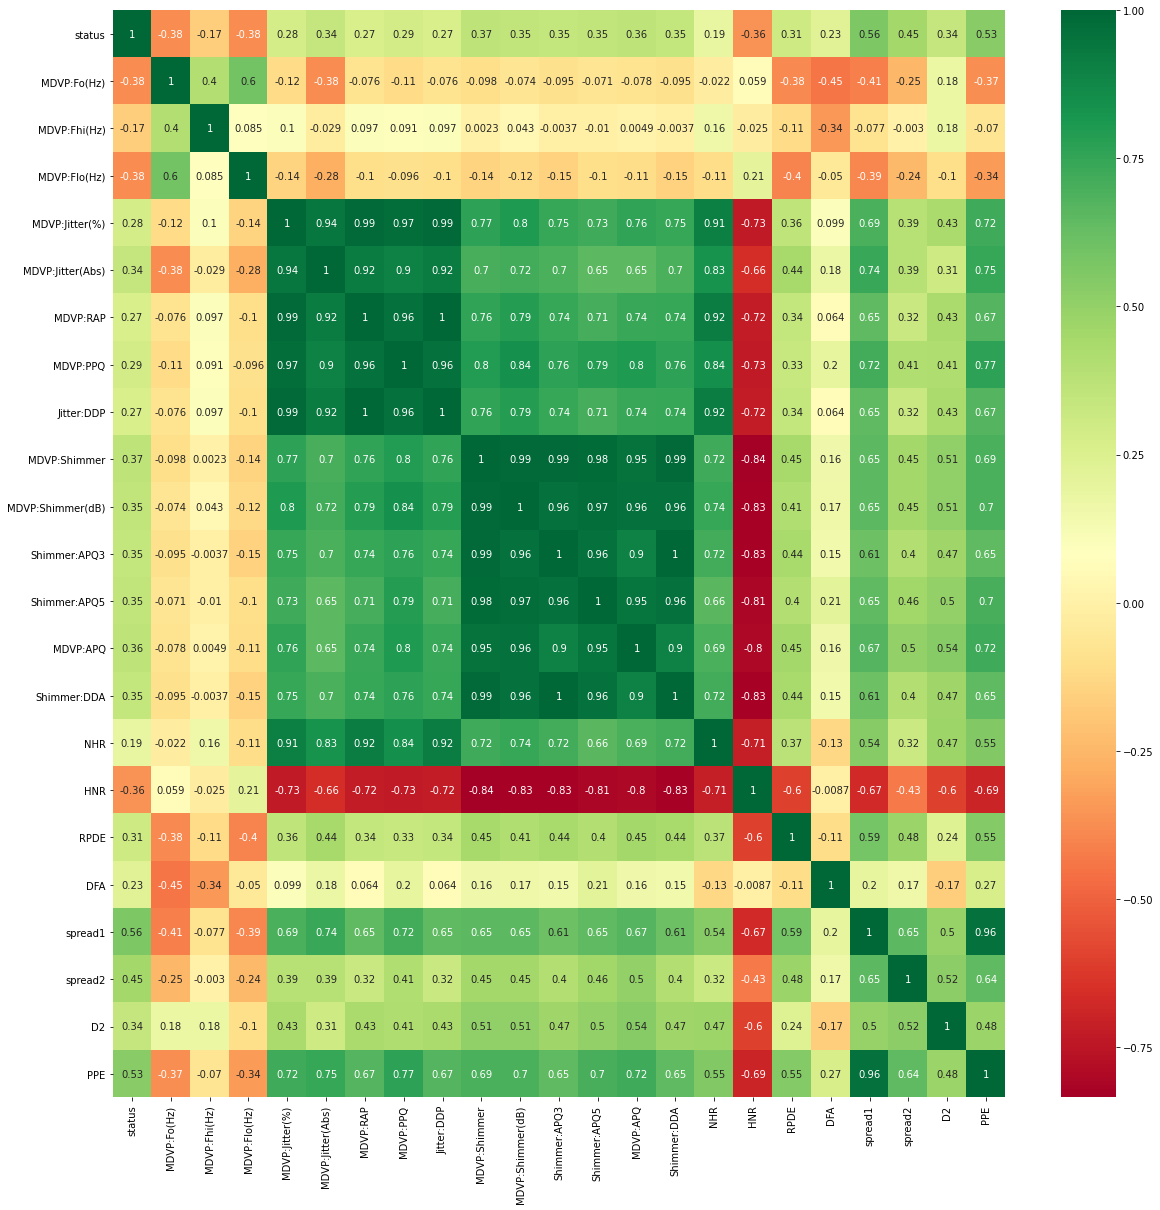

In [ ]:
#Heat map


#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

[0.10546271 0.04382675 0.08517209 0.03177373 0.04728864 0.03777796
 0.03587487 0.0351959  0.0279014  0.03194713 0.03799328 0.03886605
 0.0392785  0.03717468 0.03703568 0.03512642 0.03801576 0.04078836
 0.10236076 0.06307018 0.04806915]


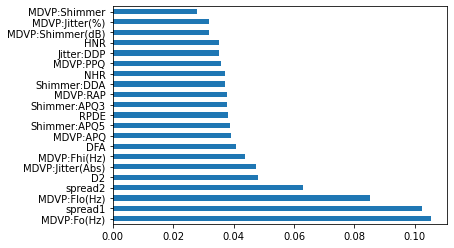

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(22).plot(kind='barh')
plt.show()

In [ ]:
#len(to_drop_feat)
#len(df.columns)
df

,status,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,1.0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,0.332627,0.347354,0.172448,0.332584,0.068307,0.511745,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,1.0,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,0.515986,0.535685,0.279424,0.516048,0.059331,0.432577,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,1.0,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,0.443374,0.446133,0.219848,0.443317,0.039596,0.496220,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,1.0,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,0.475539,0.466079,0.233785,0.475478,0.040997,0.495936,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,1.0,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,0.584553,0.577341,0.286852,0.584542,0.054174,0.455499,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.0,0.499820,0.262986,0.165722,0.092440,0.090909,0.093931,0.089496,0.094076,0.286014,0.262942,0.362288,0.261601,0.155142,0.362306,0.085909,0.450134,0.447684,0.333127,0.257894,0.260408,0.549049,0.183318
191,0.0,0.705488,0.307974,0.138243,0.125794,0.090909,0.126686,0.107181,0.126826,0.164050,0.146261,0.221302,0.147490,0.088828,0.221338,0.055543,0.435097,0.408567,0.434101,0.319956,0.276956,0.605474,0.257558
192,0.0,0.502730,0.281413,0.050727,0.378653,0.288538,0.267823,0.252947,0.267940,0.123608,0.140509,0.156587,0.107870,0.072594,0.156631,0.338988,0.383728,0.352318,0.324299,0.212945,0.342577,0.558967,0.180580
193,0.0,0.642893,0.601807,0.054279,0.181703,0.130435,0.145472,0.159700,0.145288,0.122512,0.128184,0.156009,0.101900,0.066544,0.155989,0.227838,0.429936,0.454176,0.277579,0.220650,0.452885,0.318222,0.163137


In [ ]:
drop_col=list()
for i in range(21):
    if to_drop_feat[i]==False:
        drop_col.append(df.columns[i+1])

In [ ]:
df.drop(drop_col,1,inplace=True)
df

,status,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),Jitter:DDP,spread1,spread2,PPE
0,1.0,0.184308,0.112592,0.054815,0.145288,0.569875,0.585765,0.497310
1,1.0,0.198327,0.094930,0.278323,0.191042,0.703277,0.741337,0.671326
2,1.0,0.165039,0.059128,0.265288,0.229411,0.636745,0.686371,0.596682
3,1.0,0.165004,0.072927,0.264200,0.208862,0.695627,0.738089,0.671949
4,1.0,0.161150,0.080909,0.260107,0.282870,0.762472,0.513798,0.757611
...,...,...,...,...,...,...,...,...
190,0.0,0.499820,0.262986,0.165722,0.094076,0.257894,0.260408,0.183318
191,0.0,0.705488,0.307974,0.138243,0.126826,0.319956,0.276956,0.257558
192,0.0,0.502730,0.281413,0.050727,0.267940,0.212945,0.342577,0.180580
193,0.0,0.642893,0.601807,0.054279,0.145288,0.220650,0.452885,0.163137


In [ ]:
to_drop=list(df.columns[7:8])
df.drop(to_drop,1,inplace=True)

In [ ]:
df

,status,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),Jitter:DDP,spread1,spread2
0,1.0,0.184308,0.112592,0.054815,0.145288,0.569875,0.585765
1,1.0,0.198327,0.094930,0.278323,0.191042,0.703277,0.741337
2,1.0,0.165039,0.059128,0.265288,0.229411,0.636745,0.686371
3,1.0,0.165004,0.072927,0.264200,0.208862,0.695627,0.738089
4,1.0,0.161150,0.080909,0.260107,0.282870,0.762472,0.513798
...,...,...,...,...,...,...,...
190,0.0,0.499820,0.262986,0.165722,0.094076,0.257894,0.260408
191,0.0,0.705488,0.307974,0.138243,0.126826,0.319956,0.276956
192,0.0,0.502730,0.281413,0.050727,0.267940,0.212945,0.342577
193,0.0,0.642893,0.601807,0.054279,0.145288,0.220650,0.452885


# Splitting data in train and test

In [ ]:
from sklearn.model_selection import train_test_split
df_target=pd.DataFrame(df['status'])
df.drop('status',1,inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, np.ravel(df_target), test_size=0.30, random_state=101)

# Running SVM Classifier on dataset

In [ ]:
#X_train=(X_train-X_train.mean())/X_train.std()
X_train

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),Jitter:DDP,spread1,spread2
50,0.210232,0.067208,0.299486,0.034998,0.237665,0.558787
114,0.686922,0.253549,0.152820,0.112538,0.223338,0.394911
102,0.296271,0.988848,0.003921,0.860331,0.848949,0.595128
129,0.184809,0.049985,0.231390,0.023278,0.374786,0.427046
145,0.786089,0.330133,0.127592,0.048483,0.453479,0.763056
...,...,...,...,...,...,...
63,0.817939,0.270419,0.910555,0.051694,0.130061,0.027948
70,0.316676,0.123015,0.000000,0.193129,0.405738,0.343425
81,0.042335,0.011370,0.127080,0.173222,0.512200,0.459647
11,0.020789,0.028019,0.119843,0.102745,0.543261,0.804315


In [ ]:
from sklearn.svm import SVC

In [ ]:
model=SVC(C=100,gamma=1)
model.fit(X_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
prediction=model.predict(X_test)

# Checking accuracy

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,prediction))

[[14  2]
 [ 1 42]]


In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90        16
         1.0       0.95      0.98      0.97        43

    accuracy                           0.95        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.95      0.95      0.95        59



In [ ]:
#note: model parameters are bad(default settings of SVM is not good for this data set)

# Finding right parameters for the model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [80,90,100,110,120,150], 'gamma': [1.5,1.3,1.2,1.1,1,0.9,0.8,0.7,0.6,0.5,0.1], 'kernel': ['rbf']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 66 candidates, totalling 330 fits
[CV] C=80, gamma=1.5, kernel=rbf .....................................
[CV] ......... C=80, gamma=1.5, kernel=rbf, score=0.857, total=   0.0s
[CV] C=80, gamma=1.5, kernel=rbf .....................................
[CV] ......... C=80, gamma=1.5, kernel=rbf, score=0.889, total=   0.0s
[CV] C=80, gamma=1.5, kernel=rbf .....................................
[CV] ......... C=80, gamma=1.5, kernel=rbf, score=0.963, total=   0.0s
[CV] C=80, gamma=1.5, kernel=rbf .....................................
[CV] ......... C=80, gamma=1.5, kernel=rbf, score=0.778, total=   0.0s
[CV] C=80, gamma=1.5, kernel=rbf .....................................
[CV] ......... C=80, gamma=1.5, kernel=rbf, score=0.778, total=   0.0s
[CV] C=80, gamma=1.3, kernel=rbf .....................................
[CV] ......... C=80, gamma=1.3, kernel=rbf, score=0.821, total=   0.0s
[CV] C=80, gamma=1.3, kernel=rbf .....................................
[CV] ......... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=80, gamma=0.5, kernel=rbf, score=0.741, total=   0.0s
[CV] C=80, gamma=0.5, kernel=rbf .....................................
[CV] ......... C=80, gamma=0.5, kernel=rbf, score=0.852, total=   0.0s
[CV] C=80, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=80, gamma=0.1, kernel=rbf, score=0.750, total=   0.0s
[CV] C=80, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=80, gamma=0.1, kernel=rbf, score=0.852, total=   0.0s
[CV] C=80, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=80, gamma=0.1, kernel=rbf, score=0.926, total=   0.0s
[CV] C=80, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=80, gamma=0.1, kernel=rbf, score=0.852, total=   0.0s
[CV] C=80, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=80, gamma=0.1, kernel=rbf, score=0.852, total=   0.0s
[CV] C=90, gamma=1.5, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:    1.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [80, 90, 100, 110, 120, 150],
                         'gamma': [1.5, 1.3, 1.2, 1.1, 1, 0.9, 0.8, 0.7, 0.6,
                                   0.5, 0.1],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid.best_params_

{'C': 90, 'gamma': 0.9, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=90, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.9, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Predicting with new parameter values

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

[[13  3]
 [ 1 42]]


In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.93      0.81      0.87        16
         1.0       0.93      0.98      0.95        43

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59



In [ ]:
#for top 20 features: precision=0.54
#for top 15 features: precision=0.64
#for top 12 features: precision=0.59
#for top 10 features: precision=0.69
#for top 9 features: precision=0.64
#for top 8 features: precision=0.72
#for top 7 features: precision=0.64
#for top 5 features with added feature: precision=0.74
#for top 6 features: precision=0.76

# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predic_dtree = dtree.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predic_dtree))

[[12  4]
 [ 1 42]]


In [ ]:
print(classification_report(y_test,predic_dtree))

              precision    recall  f1-score   support

         0.0       0.92      0.75      0.83        16
         1.0       0.91      0.98      0.94        43

    accuracy                           0.92        59
   macro avg       0.92      0.86      0.89        59
weighted avg       0.92      0.92      0.91        59



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[14  2]
 [ 0 43]]


In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93        16
         1.0       0.96      1.00      0.98        43

    accuracy                           0.97        59
   macro avg       0.98      0.94      0.96        59
weighted avg       0.97      0.97      0.97        59



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
rfc_new = RandomForestClassifier(n_estimators=1400,min_samples_split=10,min_samples_leaf=2,max_features='sqrt',max_depth=80,bootstrap=True)
rfc_new.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93        16
         1.0       0.96      1.00      0.98        43

    accuracy                           0.97        59
   macro avg       0.98      0.94      0.96        59
weighted avg       0.97      0.97      0.97        59



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred))

[[14  2]
 [ 2 41]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        16
         1.0       0.95      0.95      0.95        43

    accuracy                           0.93        59
   macro avg       0.91      0.91      0.91        59
weighted avg       0.93      0.93      0.93        59



In [ ]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

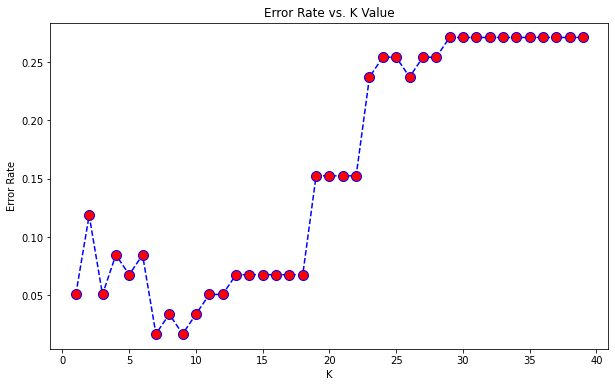

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))

[[16  0]
 [ 1 42]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        16
         1.0       1.00      0.98      0.99        43

    accuracy                           0.98        59
   macro avg       0.97      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.75      0.83        16
         1.0       0.91      0.98      0.94        43

    accuracy                           0.92        59
   macro avg       0.92      0.86      0.89        59
weighted avg       0.92      0.92      0.91        59



In [ ]:
param_grid = {'C' : [0.1,1,10,100,1000] , 'tol': [10,1,0.1,0.01,0.001,0.0001,0.000001]}
grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] C=0.1, tol=10 ...................................................
[CV] ....................... C=0.1, tol=10, score=0.750, total=   0.0s
[CV] C=0.1, tol=10 ...................................................
[CV] ....................... C=0.1, tol=10, score=0.741, total=   0.0s
[CV] C=0.1, tol=10 ...................................................
[CV] ....................... C=0.1, tol=10, score=0.778, total=   0.0s
[CV] C=0.1, tol=10 ...................................................
[CV] ....................... C=0.1, tol=10, score=0.778, total=   0.0s
[CV] C=0.1, tol=10 ...................................................
[CV] ....................... C=0.1, tol=10, score=0.778, total=   0.0s
[CV] C=0.1, tol=1 ....................................................
[CV] ........................ C=0.1, tol=1, score=0.750, total=   0.0s
[CV] C=0.1, tol=1 ....................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, tol=1e-06 ................................................
[CV] .................... C=0.1, tol=1e-06, score=0.778, total=   0.0s
[CV] C=1, tol=10 .....................................................
[CV] ......................... C=1, tol=10, score=0.750, total=   0.0s
[CV] C=1, tol=10 .....................................................
[CV] ......................... C=1, tol=10, score=0.741, total=   0.0s
[CV] C=1, tol=10 .....................................................
[CV] ......................... C=1, tol=10, score=0.778, total=   0.0s
[CV] C=1, tol=10 .....................................................
[CV] ......................... C=1, tol=10, score=0.778, total=   0.0s
[CV] C=1, tol=10 .....................................................
[CV] ......................... C=1, tol=10, score=0.778, total=   0.0s
[CV] C=1, tol=1 ......................................................
[CV] .......................... C=1, tol=1, score=0.750, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    1.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'tol': [10, 1, 0.1, 0.01, 0.001, 0.0001, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid.best_params_

{'C': 100, 'tol': 1}

In [ ]:
grid.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1, verbose=0,
                   warm_start=False)

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80        16
         1.0       0.91      0.95      0.93        43

    accuracy                           0.90        59
   macro avg       0.88      0.85      0.87        59
weighted avg       0.90      0.90      0.90        59

